In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Deep learning/data/data
#Check the present working directory using pwd command
!ls

/content/gdrive/My Drive/Deep learning/data/data
test  train


# reading data

In [ ]:
import os

classes = ['covid', 'normal', 'pneumonia']
train_paths = []
train_labels =[]
for i in range(len(classes)):
    location = 'train/class_'+classes[i]
    for path in os.listdir(location):
        train_paths.append(location + '/' + path)
        train_labels.append(i)

test_paths = []
test_labels =[]
for i in range(len(classes)):
    location = 'test/class_'+classes[i]
    for path in os.listdir(location):
        test_paths.append(location + '/' + path)
        test_labels.append(i)

# defining augmentors

In [ ]:
import imgaug.augmenters as iaa
# corona_aug = iaa.Sequential([
#                              iaa.Affine(rotate=[15, -15, 30, -30, 45, -45, 60, -60, 75, -75, 90, -90]),
#                              iaa.SomeOf(1, [
#                                      iaa.Affine(scale=(1.025, 1.1)),
#                                      iaa.Affine(scale=(0.9, 0.975))
#                                      ]),
#                              iaa.SomeOf(1, [
#                                      iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
#                                      iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})
#                                      ]),
#                              iaa.SomeOf(1, [
#                                             iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
#                                             iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)})
#                                             ])
#                              ])
corona_aug = [_ for _ in range(19)]
rotation_degs = [15, -15, 30, -30, 45, -45, 60, -60, 75, -75, 90, -90]
for i in range(12):
    corona_aug[i] = iaa.Affine(rotate=rotation_degs[i], fit_output=True)
for i in range(12, 15):
    corona_aug[i] = iaa.SomeOf(1, [
                                   iaa.Affine(scale=(1.025, 1.1)),
                                   iaa.Affine(scale=(0.9, 0.975))
                                   ])
for i in range(15, 19):
    corona_aug[i] = iaa.Sequential([
                                    iaa.SomeOf(1, [
                                                   iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
                                                   iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})
                                                   ]),
                                    iaa.SomeOf(1, [
                                                   iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
                                                   iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)})
                                                   ])
                                    ])
other_aug1 = iaa.Affine(rotate=45, fit_output=True)
other_aug2 = iaa.OneOf([
    iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
    iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)}),
    iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
    iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})])

# Augmenting the image

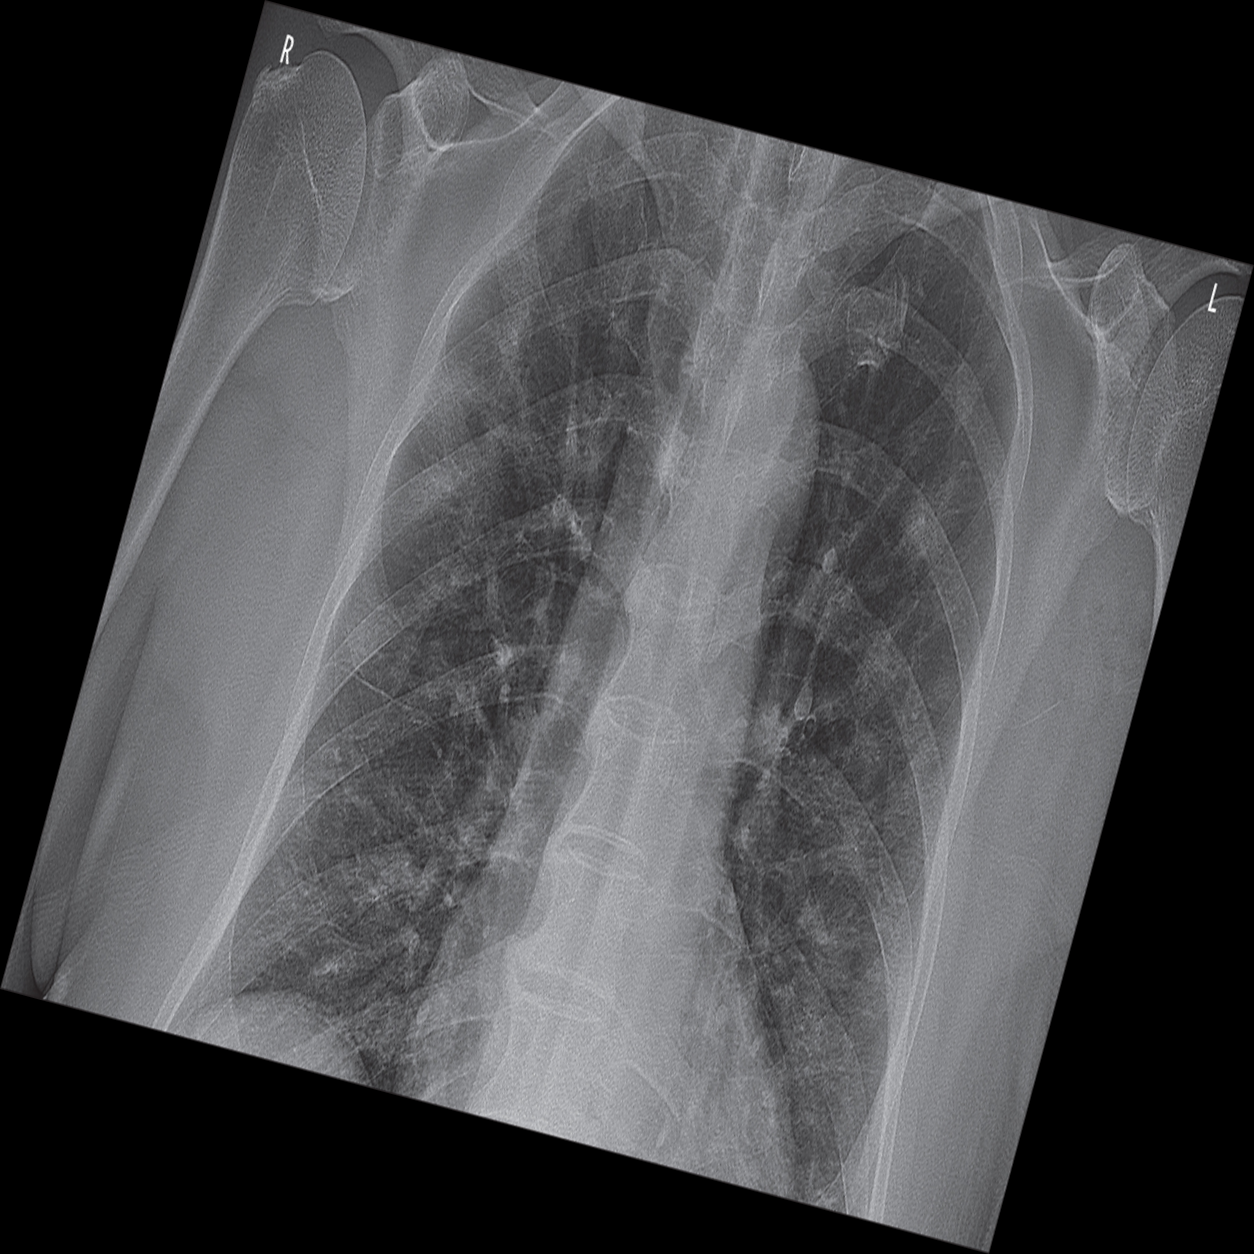

In [ ]:
import matplotlib.pyplot as plt
im = Image.open(train_paths[0])
im =corona_aug[0].augment_image(np.array(im))
Image.fromarray(im)

In [ ]:
from PIL import Image
import numpy as np
destFolder = '../../augmented_data/'
print(train_paths[0])
print(train_labels[0])
for i in range(len(train_labels)):
    print(i)
    location = destFolder + 'train/class_'+classes[train_labels[i]]
    im = Image.open(train_paths[i])
    im = np.array(im)
    if(train_labels[i] == 0):
        for j in range(19):
            temp_im = corona_aug[j].augment_image(im)
            temp_im = Image.fromarray(temp_im)

            name = train_paths[i].split('/')[-1]+str(j)
            name = name.split('.')[0] +'_'+str(j)+'.png'
            try:
                os.makedirs(location)
            except OSError:
                ;
            temp_im.save(location+'/'+name, 'PNG')
    else:
        for j in range(2):
            if(j == 0):
                temp_im = other_aug1.augment_image(im)
            else:
                temp_im = other_aug2.augment_image(im)

            temp_im = Image.fromarray(temp_im)

            name = train_paths[i].split('/')[-1]
            name = name.split('.')[0] +'_'+str(j)+'.png'
            try:
                os.makedirs(location)
            except OSError:
                ;
            temp_im.save(location+'/'+name, 'PNG')




    name = train_paths[i].split('/')[-1]
    name = name.split('.')[0] +'.png'
    try:
        os.makedirs(location)
    except OSError:
        ;
    im = Image.fromarray(im)
    im.save(location+'/'+name, 'PNG')

# Copying the test files

In [ ]:
from PIL import Image
import numpy as np
destFolder = '../../augmented_data/'
print(test_paths[0])
print(test_labels[0])
for i in range(len(test_labels)):
    location = destFolder + 'test/class_'+classes[test_labels[i]]
    im = Image.open(test_paths[i])
    name = test_paths[i].split('/')[-1]
    name = name.split('.')[0]+'.png'
    try:
        os.makedirs(location)
    except OSError:
        ;
    im.save(location+'/'+name, 'PNG')

test/class_covid/COVID-19 (10).png
0


In [ ]:
print(len(test_labels))

580


# pickle augment

In [ ]:
import imgaug.augmenters as iaa
# corona_aug = iaa.Sequential([
#                              iaa.Affine(rotate=[15, -15, 30, -30, 45, -45, 60, -60, 75, -75, 90, -90]),
#                              iaa.SomeOf(1, [
#                                      iaa.Affine(scale=(1.025, 1.1)),
#                                      iaa.Affine(scale=(0.9, 0.975))
#                                      ]),
#                              iaa.SomeOf(1, [
#                                      iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
#                                      iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})
#                                      ]),
#                              iaa.SomeOf(1, [
#                                             iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
#                                             iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)})
#                                             ])
#                              ])
corona_aug = [_ for _ in range(16)]
rotation_degs = [15, -15, 30, -30, 45, -45, 60, -60, 75, -75, 90, -90]
for i in range(12):
    corona_aug[i] = iaa.Affine(rotate=rotation_degs[i], fit_output=True)
for i in range(12, 14):
    corona_aug[i] = iaa.SomeOf(1, [
                                   iaa.Affine(scale=(1.025, 1.1)),
                                   iaa.Affine(scale=(0.9, 0.975))
                                   ])
for i in range(14, 16):
    corona_aug[i] = iaa.Sequential([
                                    iaa.SomeOf(1, [
                                                   iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
                                                   iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})
                                                   ]),
                                    iaa.SomeOf(1, [
                                                   iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
                                                   iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)})
                                                   ])
                                    ])
other_aug1 = iaa.Affine(rotate=45, fit_output=True)
# other_aug2 = iaa.OneOf([
#     iaa.Affine(translate_percent={"x": 0, "y": (-0.2, -0.05)}),
#     iaa.Affine(translate_percent={"x": 0, "y": (0.05, 0.2)}),
#     iaa.Affine(translate_percent={"x": (-0.2, -0.05), "y": 0}),
#     iaa.Affine(translate_percent={"x": (0.05, 0.2), "y": 0})])

In [ ]:
train_images = []
train_lbl = []

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300


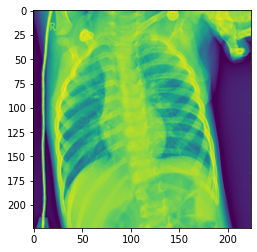

In [ ]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import os

destFolder = '../../augmented_data/'
for i in range(len(train_labels)):
    if(i%100 == 99):
        print(i+1)
    im = Image.open(train_paths[i])
    im = im.convert('L')
    im = im.resize((224,224))
    imshow(np.asarray(im))
    im = np.array(im)
    train_images.append(im)
    train_lbl.append(train_labels[i])
    if(train_labels[i] == 0):
        for j in range(16):
            temp_im = corona_aug[j].augment_image(im)
            temp_im = Image.fromarray(temp_im)
            train_images.append(temp_im)
            train_lbl.append(train_labels[i])
    else:
        temp_im = other_aug1.augment_image(im)
        train_images.append(temp_im)
        train_lbl.append(train_labels[i])

7290
7290


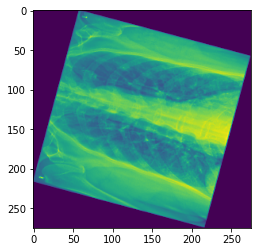

In [ ]:
print(len(train_images))
print(len(train_lbl))
imshow(train_images[10])

In [ ]:
import random
number_list = list(range(len(train_images)))
random.shuffle(number_list)
number_list = [int(x) for x in number_list]

In [ ]:
destFolder = '../../augmented_data/'
import pickle
k = len(train_images)/5
for i in range(5):
    temp_img = []
    temp_lbl = []
    for j in range(int(k)):
        temp_lbl.append(train_lbl[number_list[int(i*k+j)]])
        temp_img.append(train_images[number_list[int(i*k+j)]])
    filehandler = open(destFolder+"train"+str(i)+".obj","wb")
    pickle.dump({'images':temp_img, 'labels':temp_lbl}, filehandler)

In [ ]:
test_images = []
for i in range(len(test_labels)):
    if(i%100 == 99):
        print(i+1)
    im = Image.open(test_paths[i])
    im = im.convert('L')
    im = im.resize((224,224))
    im = np.array(im)
    test_images.append(im)

filehandler = open(destFolder+"test"+".obj","wb")
pickle.dump({'images':test_images, 'labels':test_labels}, filehandler)

100
200
300
400
500


In [ ]:
filehandler.close()